In [1]:
from mace.calculators import MACECalculator
import torch 
from ase.io import read

/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_indices = torch.l

cuequivariance or cuequivariance_torch is not available. Cuequivariance acceleration will be disabled.


In [2]:
model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']

for head in heads:
    calc = MACECalculator(model_paths=model_path,device=device,head=head)

    atoms = read("/Users/prakriti/Downloads/HalSe162_0m.cif")
    atoms.calc = calc

    print("Energy:", head, atoms.get_potential_energy())
#print("Forces:", atoms.get_forces())

/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head matpes_r2scan out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']
No dtype selected, switching to float64 to match model dtype.


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/ase/io/cif.py:410: UserWarning: crystal system 'orthorhombic' is not interpreted for space group Spacegroup(61, setting=1). This may result in wrong setting!
  warnings.warn(


KeyboardInterrupt: 

In [17]:
import torch
from calorine.tools import get_force_constants, relax_structure

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['omol']

for head in heads:
    calc = MACECalculator(model_paths=model_path,device=device,head=head,default_dtype="float32")

    atoms = read("/Users/prakriti/Downloads/POSCAR")
    atoms.calc = calc
    print("Energy:", head, atoms.get_potential_energy())
    relax_structure(atoms, fmax=0.0001)
    print("Energy:", head, atoms.get_potential_energy())

/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head omol out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']
Default dtype float32 does not match model dtype float64, converting models to float32.
Energy: omol -161019.921875


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/calorine/tools/structures.py:39: FutureWarning: Import ExpCellFilter from ase.filters
  ucf = ExpCellFilter(structure, constant_volume=constant_volume)


Energy: omol -161019.921875


In [2]:
import numpy as np
from ase.io import read, write
from ase import Atoms
from calorine.calculators import CPUNEP
from ase.spacegroup.symmetrize import FixSymmetry
from calorine.tools import get_force_constants, relax_structure
from pandas import DataFrame
from phonopy.units import THzToCm
from seekpath import get_explicit_k_path
import phonopy
from ase.constraints import UnitCellFilter
from ase.optimize import BFGS
from matplotlib import pyplot as plt
import warnings
import mplpub
mplpub.setup(template='acs')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

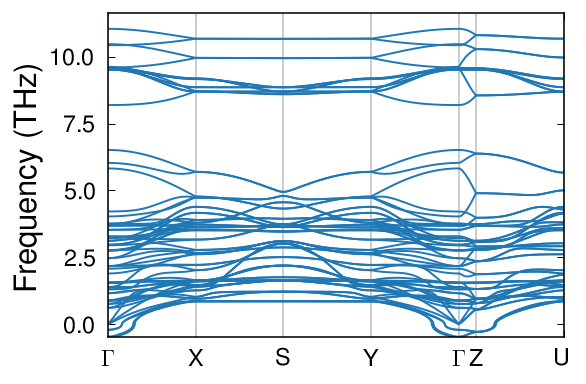

In [19]:
phonon = get_force_constants(atoms, calc, [1,1,1])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

path = "GXSYGZU"
special_points = dict(
    G = [0,0,0],
    R = [1/2, 1/2, 1/2],
    S = [1/2, 1/2, 0],
    T = [0, 1/2, 1/2],
    U = [1/2, 0, 1/2],
    X = [1/2, 0, 0],
    Y = [0, 1/2, 0],
    Z = [0 ,0, 1/2]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()
fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)

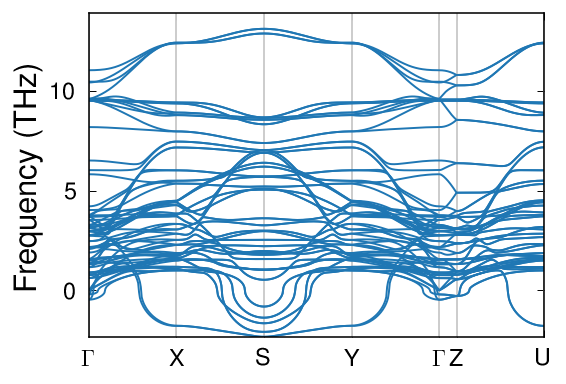

In [20]:
phonon = get_force_constants(atoms, calc, [2,2,1])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

path = "GXSYGZU"
special_points = dict(
    G = [0,0,0],
    R = [1/2, 1/2, 1/2],
    S = [1/2, 1/2, 0],
    T = [0, 1/2, 1/2],
    U = [1/2, 0, 1/2],
    X = [1/2, 0, 0],
    Y = [0, 1/2, 0],
    Z = [0 ,0, 1/2]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)
#fig.savefig('Pnm', bbox_inches='tight')

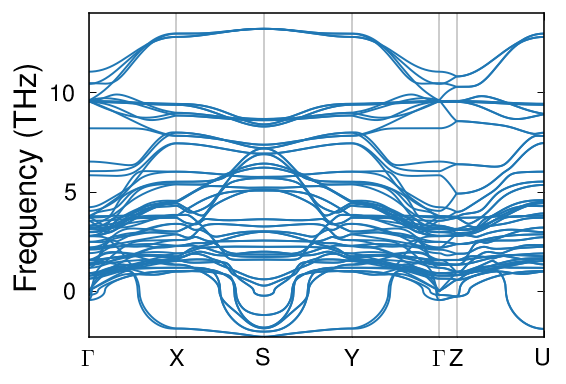

In [21]:
phonon = get_force_constants(atoms, calc, [3,3,1])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

path = "GXSYGZU"
special_points = dict(
    G = [0,0,0],
    R = [1/2, 1/2, 1/2],
    S = [1/2, 1/2, 0],
    T = [0, 1/2, 1/2],
    U = [1/2, 0, 1/2],
    X = [1/2, 0, 0],
    Y = [0, 1/2, 0],
    Z = [0 ,0, 1/2]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)
#fig.savefig('Pnm', bbox_inches='tight')

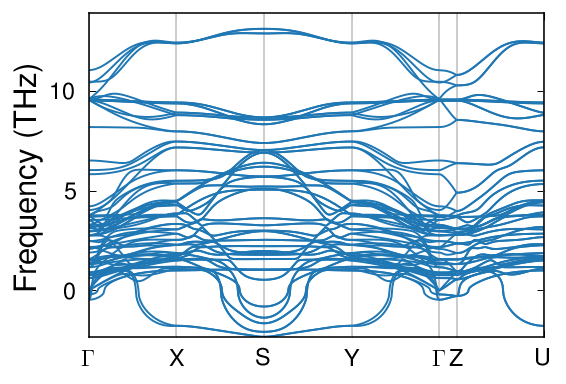

In [22]:
phonon = get_force_constants(atoms, calc, [4,4,1])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

path = "GXSYGZU"
special_points = dict(
    G = [0,0,0],
    R = [1/2, 1/2, 1/2],
    S = [1/2, 1/2, 0],
    T = [0, 1/2, 1/2],
    U = [1/2, 0, 1/2],
    X = [1/2, 0, 0],
    Y = [0, 1/2, 0],
    Z = [0 ,0, 1/2]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)
#fig.savefig('Pnm', bbox_inches='tight')

In [29]:
import torch
from calorine.tools import get_force_constants, relax_structure

model_path = "/Users/prakriti/Downloads/mace-mp-0b3-medium.model"

device = "cpu"
heads = ['omol']

#for head in heads:
calc = MACECalculator(model_paths=model_path,device=device,default_dtype="float64")

atoms = read("/Users/prakriti/Downloads/POSCAR")
atoms.calc = calc
print("Energy:", head, atoms.get_potential_energy())
relax_structure(atoms, fmax=0.0001)
print("Energy:", head, atoms.get_potential_energy())

/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head default out of ['default']
Energy: omol -147.9121558831246


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/calorine/tools/structures.py:39: FutureWarning: Import ExpCellFilter from ase.filters
  ucf = ExpCellFilter(structure, constant_volume=constant_volume)


Energy: omol -147.94629991652485


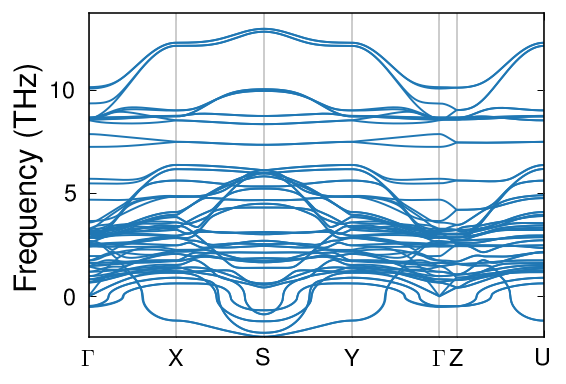

In [30]:
phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

path = "GXSYGZU"
special_points = dict(
    G = [0,0,0],
    R = [1/2, 1/2, 1/2],
    S = [1/2, 1/2, 0],
    T = [0, 1/2, 1/2],
    U = [1/2, 0, 1/2],
    X = [1/2, 0, 0],
    Y = [0, 1/2, 0],
    Z = [0 ,0, 1/2]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)
#fig.savefig('Pnm', bbox_inches='tight')

In [31]:
def get_structure(phonon):
    structure_ph = phonon.primitive
    structure_ase = Atoms(symbols=structure_ph.symbols, cell=structure_ph.cell,
                          scaled_positions=structure_ph.scaled_positions, pbc=True)
    return structure_ase

/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head default out of ['default']


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head ['omat_pbe'] out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head ['matpes_r2scan'] out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head ['spice_wB97M'] out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head ['omol'] out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']


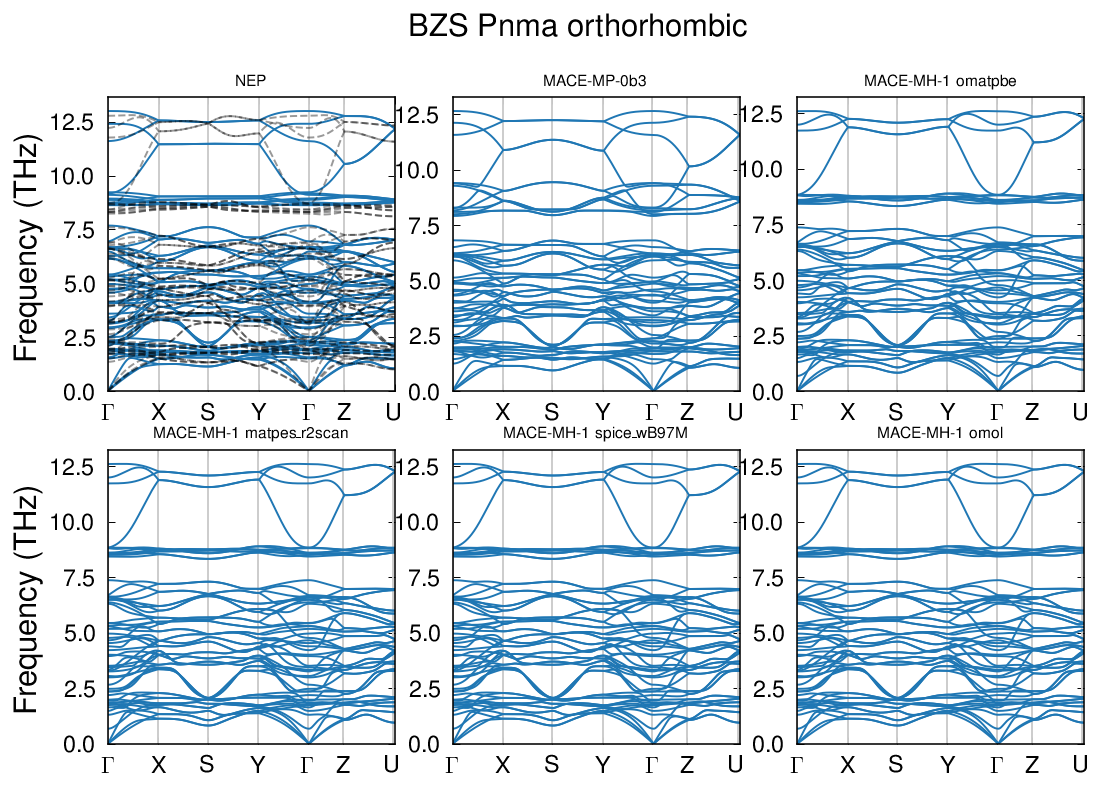

In [17]:
structure = read('/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg62-Pnma.xyz')
calculator = CPUNEP('/Users/prakriti/2024_BaZrS3_Phase_Transitions/models/nep-hse06.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0001)

phonon = get_force_constants(structure, calculator, [2, 2, 2])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)

path = "GXSYGZU"
special_points = dict(
    G = [0,0,0],
    R = [1/2, 1/2, 1/2],
    S = [1/2, 1/2, 0],
    T = [0, 1/2, 1/2],
    U = [1/2, 0, 1/2],
    X = [1/2, 0, 0],
    Y = [0, 1/2, 0],
    Z = [0 ,0, 1/2]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

phonon_DFT = phonopy.load("/Users/prakriti/2024_BaZrS3_Phase_Transitions/data/DFT_BaZrS3_tilt_62.yaml")
phonon_DFT.run_band_structure(path_list)
band_DFT = phonon.get_band_structure_dict()
phonopy_paths_DFT, phonopy_dists_DFT, phonopy_freqs_DFT, *_ = phonon_DFT.get_band_structure()

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(9, 6), dpi=140)
ax1.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)
for xp in xticks:
    ax1.axvline(xp, color='0.8')

ax1.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax1.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs_DFT), color='black', alpha = 0.4, linestyle='--')
ax1.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax1.set_ylim(np.vstack(phonopy_freqs).min())
ax1.tick_params(labelsize=12)
ax1.set_title('NEP')


model_path = "/Users/prakriti/Downloads/mace-mp-0b3-medium.model"

device = "cpu"
heads = ['omol']

#for head in heads:
calc = MACECalculator(model_paths=model_path,device=device,default_dtype="float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg62-Pnma.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

ax2.set_xticks(xticks)
ax2.set_xticklabels(labels)
for xp in xticks:
    ax2.axvline(xp, color='0.8')

ax2.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax2.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax2.set_ylim(np.vstack(phonopy_freqs).min())
ax2.tick_params(labelsize=12)
ax2.set_title('MACE-MP-0b3')

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['omat_pbe']

#for head in heads:
calc = MACECalculator(model_paths = model_path, device=device, head = heads, default_dtype = "float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg62-Pnma.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()


ax3.set_xticks(xticks)
ax3.set_xticklabels(labels)
for xp in xticks:
    ax3.axvline(xp, color='0.8')

ax3.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax3.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax3.set_ylim(np.vstack(phonopy_freqs).min())
ax3.tick_params(labelsize=12)
ax3.set_title('MACE-MH-1 omatpbe')

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['matpes_r2scan']

#for head in heads:
calc = MACECalculator(model_paths = model_path, device=device, head = heads, default_dtype = "float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg62-Pnma.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

ax4.set_ylabel('Frequency (THz)', fontsize=16)
ax4.set_xticks(xticks)
ax4.set_xticklabels(labels)
for xp in xticks:
    ax4.axvline(xp, color='0.8')

ax4.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax4.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax4.set_ylim(np.vstack(phonopy_freqs).min())
ax4.tick_params(labelsize=12)
ax4.set_title('MACE-MH-1 matpes_r2scan')

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['spice_wB97M']

#for head in heads:
calc = MACECalculator(model_paths = model_path, device=device, head = heads, default_dtype = "float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg62-Pnma.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()


ax5.set_xticks(xticks)
ax5.set_xticklabels(labels)
for xp in xticks:
    ax5.axvline(xp, color='0.8')

ax5.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax5.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax5.set_ylim(np.vstack(phonopy_freqs).min())
ax5.tick_params(labelsize=12)
ax5.set_title('MACE-MH-1 spice_wB97M')

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['omol']

#for head in heads:
calc = MACECalculator(model_paths = model_path, device=device, head = heads, default_dtype = "float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg62-Pnma.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()


ax6.set_xticks(xticks)
ax6.set_xticklabels(labels)
for xp in xticks:
    ax6.axvline(xp, color='0.8')

ax6.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax6.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax6.set_ylim(np.vstack(phonopy_freqs).min())
ax6.tick_params(labelsize=12)
ax6.set_title('MACE-MH-1 omol')
fig.suptitle('BZS Pnma orthorhombic', fontsize = 16)
fig.savefig('/Users/prakriti/test_BZS_Pnma_DFT_vs_NEP_MACE.png', bbox_inches='tight')


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head default out of ['default']


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head ['omat_pbe'] out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head ['matpes_r2scan'] out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head ['spice_wB97M'] out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head ['omol'] out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']


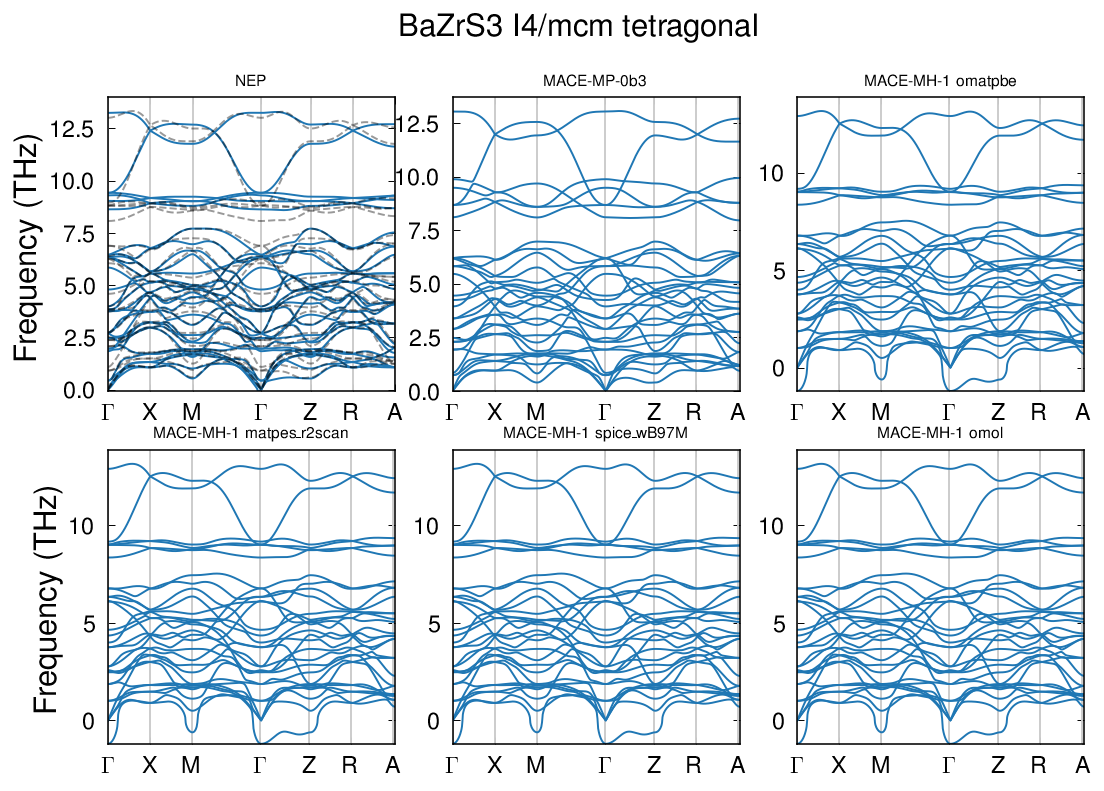

In [18]:
structure = read('/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg140-I4mcm.xyz')
calculator = CPUNEP('/Users/prakriti/2024_BaZrS3_Phase_Transitions/models/nep-hse06.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0001)

phonon = get_force_constants(structure, calculator, [2, 2, 2])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)

path = "GXMGZRA"
special_points = dict(
    G = [0,0,0],
    A = [1/2, 1/2, 1/2],
    M = [1/2, 1/2, 0],
    R = [0, 1/2, 1/2],
    X = [0, 1/2, 0],
    Z = [0 ,0, 1/2]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

phonon_DFT = phonopy.load("/Users/prakriti/2024_BaZrS3_Phase_Transitions/data/DFT_BaZrS3_tilt_140.yaml")
phonon_DFT.run_band_structure(path_list)
band_DFT = phonon.get_band_structure_dict()
phonopy_paths_DFT, phonopy_dists_DFT, phonopy_freqs_DFT, *_ = phonon_DFT.get_band_structure()

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(9, 6), dpi=140)
ax1.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)
for xp in xticks:
    ax1.axvline(xp, color='0.8')

ax1.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax1.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs_DFT), color='black', alpha = 0.4, linestyle='--')
ax1.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax1.set_ylim(np.vstack(phonopy_freqs).min())
ax1.tick_params(labelsize=12)
ax1.set_title('NEP')


model_path = "/Users/prakriti/Downloads/mace-mp-0b3-medium.model"

device = "cpu"
heads = ['omol']

#for head in heads:
calc = MACECalculator(model_paths=model_path,device=device,default_dtype="float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg140-I4mcm.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

ax2.set_xticks(xticks)
ax2.set_xticklabels(labels)
for xp in xticks:
    ax2.axvline(xp, color='0.8')

ax2.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax2.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax2.set_ylim(np.vstack(phonopy_freqs).min())
ax2.tick_params(labelsize=12)
ax2.set_title('MACE-MP-0b3')

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['omat_pbe']

#for head in heads:
calc = MACECalculator(model_paths = model_path, device=device, head = heads, default_dtype = "float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg140-I4mcm.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()


ax3.set_xticks(xticks)
ax3.set_xticklabels(labels)
for xp in xticks:
    ax3.axvline(xp, color='0.8')

ax3.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax3.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax3.set_ylim(np.vstack(phonopy_freqs).min())
ax3.tick_params(labelsize=12)
ax3.set_title('MACE-MH-1 omatpbe')

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['matpes_r2scan']

#for head in heads:
calc = MACECalculator(model_paths = model_path, device=device, head = heads, default_dtype = "float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg140-I4mcm.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

ax4.set_ylabel('Frequency (THz)', fontsize=16)
ax4.set_xticks(xticks)
ax4.set_xticklabels(labels)
for xp in xticks:
    ax4.axvline(xp, color='0.8')

ax4.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax4.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax4.set_ylim(np.vstack(phonopy_freqs).min())
ax4.tick_params(labelsize=12)
ax4.set_title('MACE-MH-1 matpes_r2scan')

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['spice_wB97M']

#for head in heads:
calc = MACECalculator(model_paths = model_path, device=device, head = heads, default_dtype = "float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg140-I4mcm.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()


ax5.set_xticks(xticks)
ax5.set_xticklabels(labels)
for xp in xticks:
    ax5.axvline(xp, color='0.8')

ax5.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax5.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax5.set_ylim(np.vstack(phonopy_freqs).min())
ax5.tick_params(labelsize=12)
ax5.set_title('MACE-MH-1 spice_wB97M')

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['omol']

#for head in heads:
calc = MACECalculator(model_paths = model_path, device=device, head = heads, default_dtype = "float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg140-I4mcm.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()


ax6.set_xticks(xticks)
ax6.set_xticklabels(labels)
for xp in xticks:
    ax6.axvline(xp, color='0.8')

ax6.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax6.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax6.set_ylim(np.vstack(phonopy_freqs).min())
ax6.tick_params(labelsize=12)
ax6.set_title('MACE-MH-1 omol')
fig.suptitle('BaZrS3 I4/mcm tetragonal', fontsize = 16)
fig.savefig('/Users/prakriti/test_BZS_I4_mcm_DFT_vs_NEP_MACE.png', bbox_inches='tight')


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head default out of ['default']


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head ['omat_pbe'] out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head ['matpes_r2scan'] out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head ['spice_wB97M'] out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head ['omol'] out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']


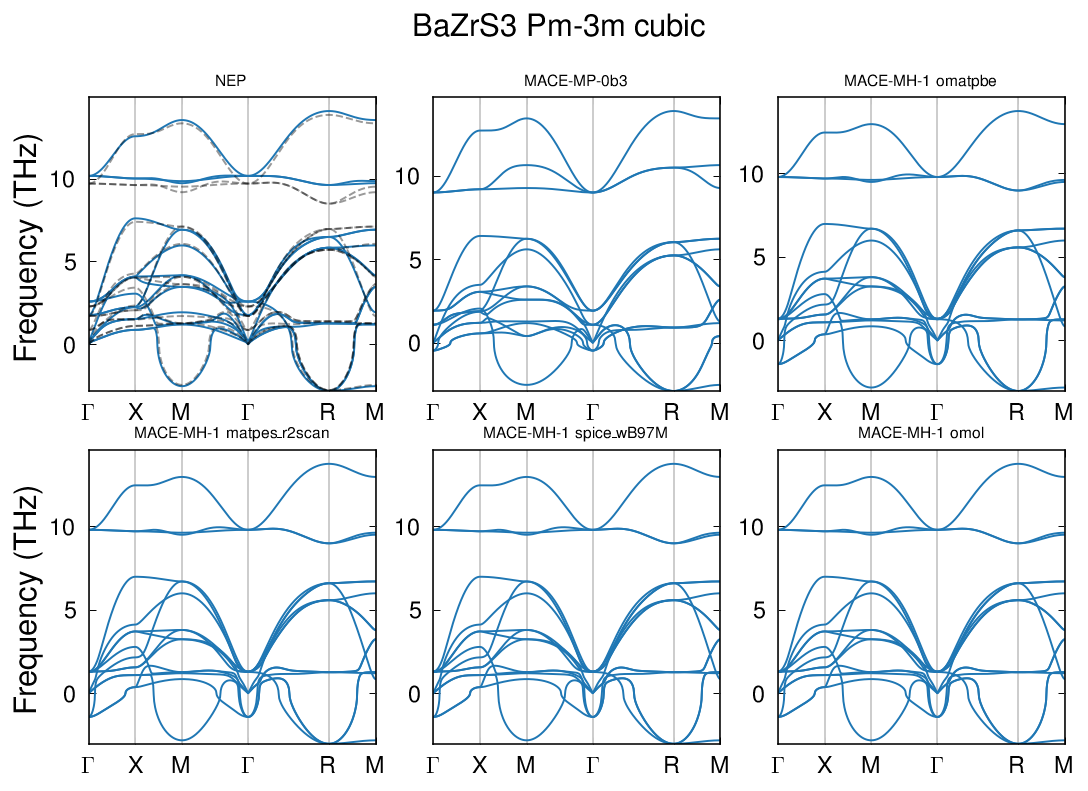

In [13]:
structure = read('/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg221-Pm3m.xyz')
calculator = CPUNEP('/Users/prakriti/2024_BaZrS3_Phase_Transitions/models/nep-hse06.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0001, constant_cell=True)

phonon = get_force_constants(structure, calculator, [2, 2, 2])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)

path = "GXMGRM"
special_points = dict(
    G = [0,0,0],
    M = [1/2, 1/2, 0],
    R = [1/2, 1/2, 1/2],
    X = [0, 1/2, 0]
)

path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

phonon_DFT = phonopy.load("/Users/prakriti/2024_BaZrS3_Phase_Transitions/data/DFT_BaZrS3_tilt_221.yaml")
phonon_DFT.run_band_structure(path_list)
band_DFT = phonon.get_band_structure_dict()
phonopy_paths_DFT, phonopy_dists_DFT, phonopy_freqs_DFT, *_ = phonon_DFT.get_band_structure()

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(9, 6), dpi=140)
ax1.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)
for xp in xticks:
    ax1.axvline(xp, color='0.8')

ax1.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax1.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs_DFT), color='black', alpha = 0.4, linestyle='--')
ax1.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax1.set_ylim(np.vstack(phonopy_freqs).min())
ax1.tick_params(labelsize=12)
ax1.set_title('NEP')


model_path = "/Users/prakriti/Downloads/mace-mp-0b3-medium.model"

device = "cpu"
heads = ['omol']

#for head in heads:
calc = MACECalculator(model_paths=model_path,device=device,default_dtype="float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg221-Pm3m.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

ax2.set_xticks(xticks)
ax2.set_xticklabels(labels)
for xp in xticks:
    ax2.axvline(xp, color='0.8')

ax2.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax2.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax2.set_ylim(np.vstack(phonopy_freqs).min())
ax2.tick_params(labelsize=12)
ax2.set_title('MACE-MP-0b3')

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['omat_pbe']

#for head in heads:
calc = MACECalculator(model_paths = model_path, device=device, head = heads, default_dtype = "float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg221-Pm3m.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()


ax3.set_xticks(xticks)
ax3.set_xticklabels(labels)
for xp in xticks:
    ax3.axvline(xp, color='0.8')

ax3.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax3.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax3.set_ylim(np.vstack(phonopy_freqs).min())
ax3.tick_params(labelsize=12)
ax3.set_title('MACE-MH-1 omatpbe')

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['matpes_r2scan']

#for head in heads:
calc = MACECalculator(model_paths = model_path, device=device, head = heads, default_dtype = "float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg221-Pm3m.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

ax4.set_ylabel('Frequency (THz)', fontsize=16)
ax4.set_xticks(xticks)
ax4.set_xticklabels(labels)
for xp in xticks:
    ax4.axvline(xp, color='0.8')

ax4.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax4.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax4.set_ylim(np.vstack(phonopy_freqs).min())
ax4.tick_params(labelsize=12)
ax4.set_title('MACE-MH-1 matpes_r2scan')

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['spice_wB97M']

#for head in heads:
calc = MACECalculator(model_paths = model_path, device=device, head = heads, default_dtype = "float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg221-Pm3m.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()


ax5.set_xticks(xticks)
ax5.set_xticklabels(labels)
for xp in xticks:
    ax5.axvline(xp, color='0.8')

ax5.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax5.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax5.set_ylim(np.vstack(phonopy_freqs).min())
ax5.tick_params(labelsize=12)
ax5.set_title('MACE-MH-1 spice_wB97M')

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['omol']

#for head in heads:
calc = MACECalculator(model_paths = model_path, device=device, head = heads, default_dtype = "float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg221-Pm3m.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()


ax6.set_xticks(xticks)
ax6.set_xticklabels(labels)
for xp in xticks:
    ax6.axvline(xp, color='0.8')

ax6.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax6.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax6.set_ylim(np.vstack(phonopy_freqs).min())
ax6.tick_params(labelsize=12)
ax6.set_title('MACE-MH-1 omol')
fig.suptitle('BaZrS3 Pm-3m cubic', fontsize = 16)
fig.savefig('/Users/prakriti/test_BZS_Pm-3m_DFT_vs_NEP_MACE.png', bbox_inches='tight')


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head default out of ['default']


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head ['omat_pbe'] out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']


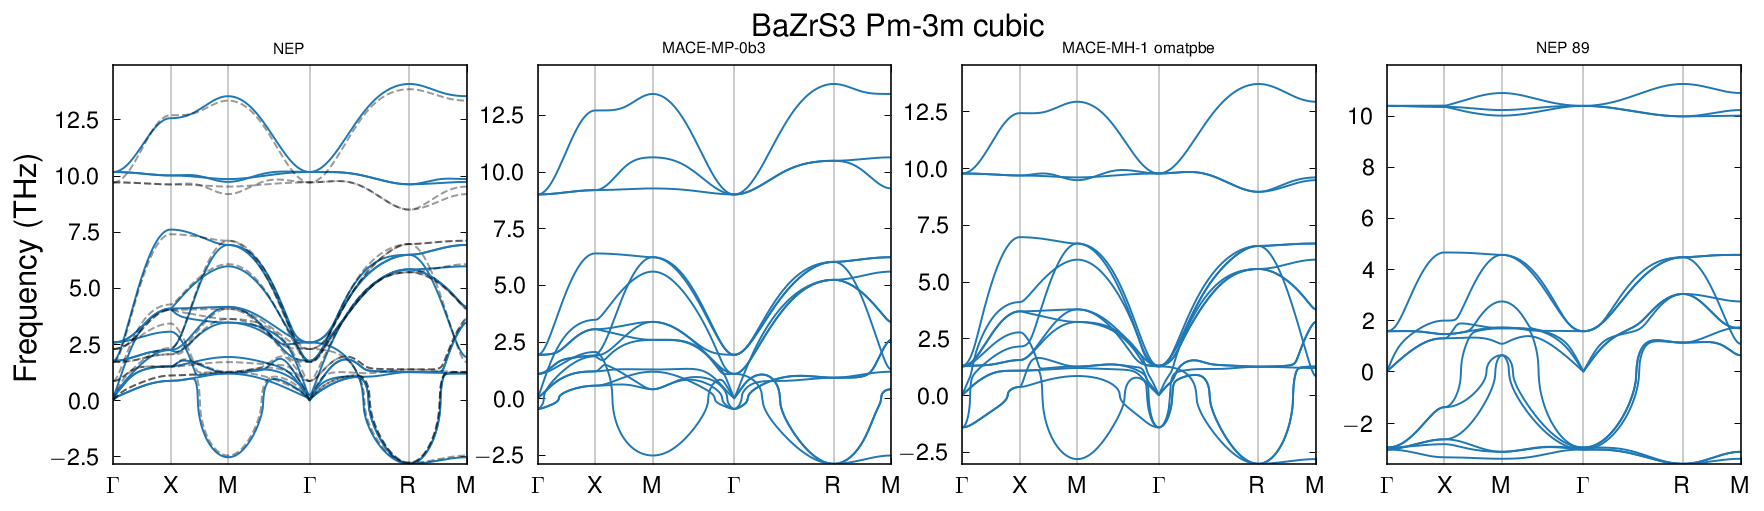

In [25]:
structure = read('/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg221-Pm3m.xyz')
calculator = CPUNEP('/Users/prakriti/2024_BaZrS3_Phase_Transitions/models/nep-hse06.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0001, constant_cell=True)

phonon = get_force_constants(structure, calculator, [2, 2, 2])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)

path = "GXMGRM"
special_points = dict(
    G = [0,0,0],
    M = [1/2, 1/2, 0],
    R = [1/2, 1/2, 1/2],
    X = [0, 1/2, 0]
)

path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

phonon_DFT = phonopy.load("/Users/prakriti/2024_BaZrS3_Phase_Transitions/data/DFT_BaZrS3_tilt_221.yaml")
phonon_DFT.run_band_structure(path_list)
band_DFT = phonon.get_band_structure_dict()
phonopy_paths_DFT, phonopy_dists_DFT, phonopy_freqs_DFT, *_ = phonon_DFT.get_band_structure()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15, 3.7), dpi=140)
ax1.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)
for xp in xticks:
    ax1.axvline(xp, color='0.8')

ax1.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax1.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs_DFT), color='black', alpha = 0.4, linestyle='--')
ax1.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax1.set_ylim(np.vstack(phonopy_freqs).min())
ax1.tick_params(labelsize=12)
ax1.set_title('NEP')


model_path = "/Users/prakriti/Downloads/mace-mp-0b3-medium.model"

device = "cpu"
heads = ['omol']

#for head in heads:
calc = MACECalculator(model_paths=model_path,device=device,default_dtype="float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg221-Pm3m.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

ax2.set_xticks(xticks)
ax2.set_xticklabels(labels)
for xp in xticks:
    ax2.axvline(xp, color='0.8')

ax2.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax2.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax2.set_ylim(np.vstack(phonopy_freqs).min())
ax2.tick_params(labelsize=12)
ax2.set_title('MACE-MP-0b3')

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['omat_pbe']

#for head in heads:
calc = MACECalculator(model_paths = model_path, device=device, head = heads, default_dtype = "float64")

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg221-Pm3m.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()


ax3.set_xticks(xticks)
ax3.set_xticklabels(labels)
for xp in xticks:
    ax3.axvline(xp, color='0.8')

ax3.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax3.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax3.set_ylim(np.vstack(phonopy_freqs).min())
ax3.tick_params(labelsize=12)
ax3.set_title('MACE-MH-1 omatpbe')

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['matpes_r2scan']

#for head in heads:
calc = CPUNEP('/Users/prakriti/Downloads/nep89_20250409.txt')

atoms = read("/Users/prakriti/2024_BaZrS3_Phase_Transitions/structures/BaZrS3-spg221-Pm3m.xyz")
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

ax4.set_xticks(xticks)
ax4.set_xticklabels(labels)
for xp in xticks:
    ax4.axvline(xp, color='0.8')

ax4.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax4.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax4.set_ylim(np.vstack(phonopy_freqs).min())
ax4.tick_params(labelsize=12)
ax4.set_title('NEP 89')


fig.suptitle('BaZrS3 Pm-3m cubic', fontsize = 16)
fig.savefig('/Users/prakriti/test_BZS_Pm-3m_DFT_vs_NEP_vs_foundationalMACE_foundationalNEP.png', bbox_inches='tight')


# BaTiO3

/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head default out of ['default']


/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/mace/calculators/mace.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_lo

Using head ['omat_pbe'] out of ['matpes_r2scan', 'mp_pbe_refit_add', 'spice_wB97M', 'oc20_usemppbe', 'omol', 'omat_pbe']


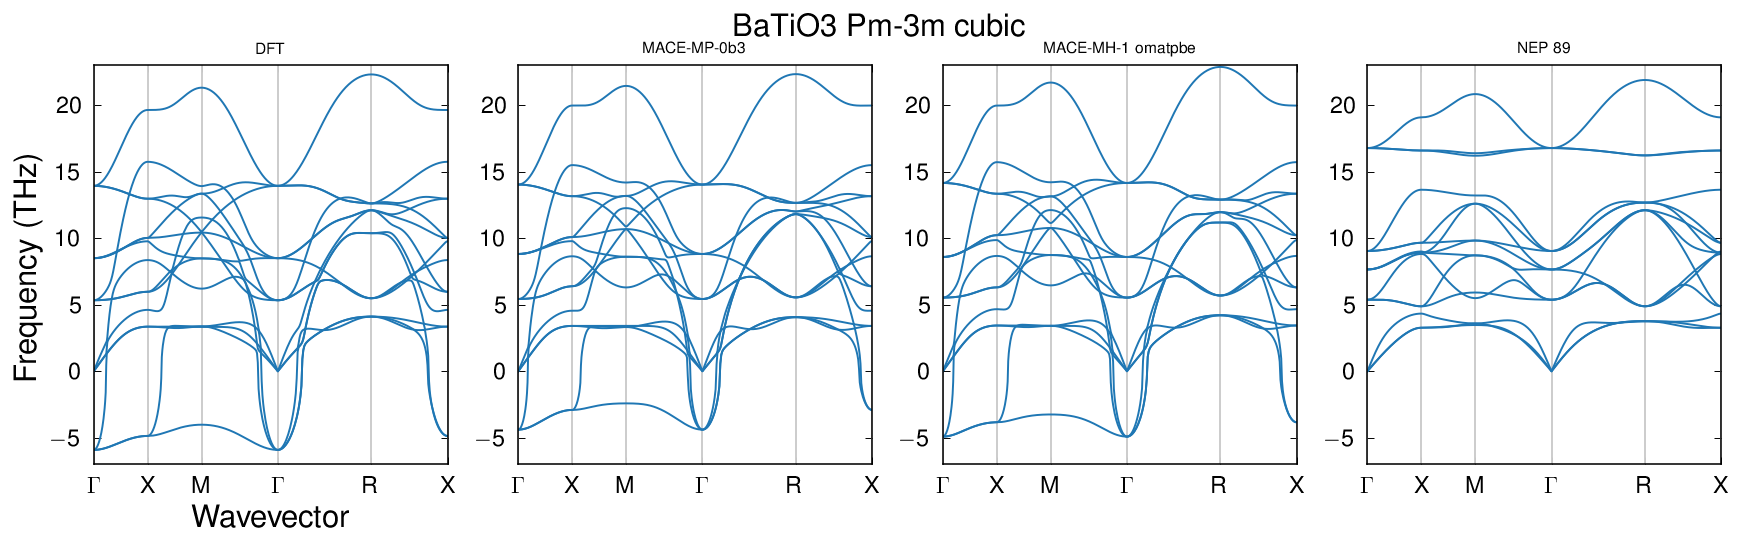

In [34]:


path = "GXMGRX"
special_points = dict(
    G = [0,0,0],
    M = [1/2,1/2,0],
    R = [1/2,1/2,1/2],
    X = [0,1/2,0]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))


phonon_DFT = phonopy.load('/Users/prakriti/BaTiO3_phonons/phonopy/output/phonopy.yaml')
phonon_DFT.run_band_structure(path_list)
band_DFT = phonon_DFT.get_band_structure_dict()
phonopy_paths_DFT, phonopy_dists_DFT, phonopy_freqs_DFT, *_ = phonon_DFT.get_band_structure()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15, 3.7), dpi=140)
ax1.set_ylabel('Frequency (THz)', fontsize=16)
ax1.set_xlabel('Wavevector', fontsize=16)

xticks = [d[0] for d in phonopy_dists_DFT] + [phonopy_dists_DFT[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)
for xp in xticks:
    ax1.axvline(xp, color='0.8')

#ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax1.plot(np.hstack(phonopy_dists_DFT), np.vstack(phonopy_freqs_DFT), color='tab:blue', alpha = 1, linestyle='-')
ax1.set_xlim(np.hstack(phonopy_dists_DFT).min(),np.hstack(phonopy_dists_DFT).max())
ax1.set_ylim([-7,23])
ax1.tick_params(labelsize=12)
ax1.set_title('DFT')

model_path = "/Users/prakriti/Downloads/mace-mp-0b3-medium.model"

device = "cpu"
heads = ['omol']

#for head in heads:
calc = MACECalculator(model_paths=model_path,device=device,default_dtype="float64")

atoms = read("/Users/prakriti/BaTiO3_phonons/geometry.in", format = 'aims')
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

ax2.set_xticks(xticks)
ax2.set_xticklabels(labels)
for xp in xticks:
    ax2.axvline(xp, color='0.8')

ax2.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax2.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax2.set_ylim(np.vstack(phonopy_freqs).min())
ax2.set_ylim([-7,23])
ax2.tick_params(labelsize=12)
ax2.set_title('MACE-MP-0b3')

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['omat_pbe']

#for head in heads:
calc = MACECalculator(model_paths = model_path, device=device, head = heads, default_dtype = "float64")

atoms = read("/Users/prakriti/BaTiO3_phonons/geometry.in", format = 'aims')
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()


ax3.set_xticks(xticks)
ax3.set_xticklabels(labels)
for xp in xticks:
    ax3.axvline(xp, color='0.8')

ax3.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax3.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax3.set_ylim(np.vstack(phonopy_freqs).min())
ax3.set_ylim([-7,23])
ax3.tick_params(labelsize=12)
ax3.set_title('MACE-MH-1 omatpbe')

model_path = "/Users/prakriti/Downloads/mace-mh-1.model"

device = "cpu"
heads = ['matpes_r2scan']

#for head in heads:
calc = CPUNEP('/Users/prakriti/Downloads/nep89_20250409.txt')

atoms = read("/Users/prakriti/BaTiO3_phonons/geometry.in", format = 'aims')
atoms.calc = calc
atoms.set_constraint(FixSymmetry(atoms))
relax_structure(atoms, fmax=0.000001, constant_cell=True)

phonon = get_force_constants(atoms, calc, [2,2,2])
structure_tuple = (atoms.cell, atoms.get_scaled_positions(), atoms.numbers)

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

ax4.set_xticks(xticks)
ax4.set_xticklabels(labels)
for xp in xticks:
    ax4.axvline(xp, color='0.8')

ax4.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax4.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax4.set_ylim(np.vstack(phonopy_freqs).min())
ax4.set_ylim([-7,23])
ax4.tick_params(labelsize=12)
ax4.set_title('NEP 89')


fig.suptitle('BaTiO3 Pm-3m cubic', fontsize = 16)
fig.savefig('/Users/prakriti/test_BTO_Pm-3m_DFT_vs_foundationalMACE_foundationalNEP.png', bbox_inches='tight')